In [21]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd "/content/gdrive/MyDrive/Colab Notebooks"

import pandas as pd
from lightgbm import LGBMClassifier, LGBMRegressor
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import lightgbm as lgb
from lightgbm import plot_importance
from sklearn import metrics
import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from tqdm import tqdm
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/Colab Notebooks


In [22]:
df = pd.read_csv("train_공개.csv")
df=df.drop(["id"],axis=1)
df=df.astype('float')

In [3]:
for i in range(len(df)):
    if df["이완기 혈압"].iloc[i] >= 1000:
        df["이완기 혈압"].iloc[i] = (df["이완기 혈압"].iloc[i])/10
        
for i in range(len(df)):
    if df["수축기 혈압"].iloc[i] >= 1000:
        df["수축기 혈압"].iloc[i] = (df["수축기 혈압"].iloc[i])/10
                
        
        
for i in range(len(df)):
    if df["이완기 혈압"].iloc[i] < 0:
        df["이완기 혈압"].iloc[i] = (df["이완기 혈압"].iloc[i])*(-1)

for i in range(len(df)):
    if df["수축기 혈압"].iloc[i] < 0:
        df["수축기 혈압"].iloc[i] = (df["수축기 혈압"].iloc[i])*(-1)
        
      
        
        


In [4]:
a=df.columns
for i in range(len(a)):
    df=df.dropna(subset=[a[i]])
df.describe()

,나이,성별,키,몸무게,수축기 혈압,이완기 혈압,콜레스테롤,포도당,흡연,음주,신체활동,label
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,19468.299417,1.349317,164.356983,74.226097,127.033877,82.158950,1.366150,1.226883,0.087750,0.053517,0.804483,0.499700
std,2465.005682,0.476758,8.220935,14.398333,26.059128,22.957416,0.679234,0.572433,0.282933,0.225063,0.396601,0.500004
min,10859.000000,1.000000,57.000000,10.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17666.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19702.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21324.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,1602.000000,1100.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
df = df.drop(index=df[df['수축기 혈압']>200].index)
df = df.drop(index=df[df['수축기 혈압']<=40].index)
df = df.drop(index=df[df['이완기 혈압']>150].index)
df = df.drop(index=df[df['이완기 혈압']<=30].index)
df = df.drop(index=df[df['키']>210].index)
df = df.drop(index=df[df['몸무게']>200].index)
df["BMI"] = df["몸무게"]/((df["키"]/100)**2)
df["콜흡"] = df["콜레스테롤"] * df["흡연"]
df["콜음"] = df["콜레스테롤"] * df["음주"]
df["콜포"] = df["콜레스테롤"] * df["포도당"]
df["차"] = df["수축기 혈압"] - df["이완기 혈압"] 

In [25]:
df

,나이,성별,키,몸무게,수축기 혈압,이완기 혈압,콜레스테롤,포도당,흡연,음주,신체활동,label,BMI,콜흡,콜음,콜포,차
0,18371.0,2.0,172.0,104.0,156.0,96.0,1.0,1.0,0.0,0.0,0.0,1.0,35.154137,0.0,0.0,1.0,60.0
1,14455.0,1.0,164.0,62.0,110.0,70.0,1.0,1.0,0.0,0.0,1.0,0.0,23.051755,0.0,0.0,1.0,40.0
2,17533.0,2.0,177.0,86.0,120.0,80.0,1.0,1.0,0.0,0.0,1.0,0.0,27.450605,0.0,0.0,1.0,40.0
3,16010.0,2.0,175.0,88.0,120.0,80.0,1.0,1.0,0.0,0.0,1.0,1.0,28.734694,0.0,0.0,1.0,40.0
4,16091.0,1.0,165.0,88.0,130.0,90.0,1.0,1.0,0.0,0.0,0.0,0.0,32.323232,0.0,0.0,1.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,18215.0,1.0,174.0,73.0,110.0,70.0,2.0,1.0,0.0,0.0,1.0,1.0,24.111507,0.0,0.0,2.0,40.0
59996,21979.0,2.0,169.0,68.0,120.0,80.0,1.0,3.0,0.0,1.0,1.0,0.0,23.808690,0.0,1.0,3.0,40.0
59997,14557.0,2.0,178.0,87.0,110.0,70.0,2.0,1.0,1.0,0.0,1.0,1.0,27.458654,2.0,0.0,2.0,40.0
59998,18842.0,2.0,168.0,62.0,110.0,70.0,2.0,1.0,0.0,0.0,1.0,0.0,21.967120,0.0,0.0,2.0,40.0


In [26]:
df.corr()

,나이,성별,키,몸무게,수축기 혈압,이완기 혈압,콜레스테롤,포도당,흡연,음주,신체활동,label,BMI,콜흡,콜음,콜포,차
나이,1.000000,-0.024120,-0.081436,0.054890,0.212177,0.156408,0.155357,0.097928,-0.047990,-0.026675,-0.007518,0.243478,0.084819,-0.021448,-0.003278,0.135889,0.169789
성별,-0.024120,1.000000,0.499404,0.154180,0.056929,0.065692,-0.037638,-0.023861,0.340731,0.170944,0.004677,0.004545,-0.097685,0.296663,0.142030,-0.036415,0.026696
키,-0.081436,0.499404,1.000000,0.287118,0.015959,0.036410,-0.049848,-0.020063,0.189827,0.094175,-0.009684,-0.013220,-0.294092,0.168638,0.078702,-0.036858,-0.006820
몸무게,0.054890,0.154180,0.287118,1.000000,0.271395,0.253691,0.138775,0.103667,0.066928,0.067080,-0.017981,0.181369,0.763848,0.078456,0.079118,0.120268,0.174544
수축기 혈압,0.212177,0.056929,0.015959,0.271395,1.000000,0.704880,0.192318,0.091096,0.023261,0.030900,-0.000665,0.428702,0.233594,0.045341,0.051258,0.142021,0.825878
이완기 혈압,0.156408,0.065692,0.036410,0.253691,0.704880,1.000000,0.158176,0.073539,0.022724,0.038927,0.001492,0.340457,0.208569,0.043760,0.057467,0.118060,0.182192
콜레스테롤,0.155357,-0.037638,-0.049848,0.138775,0.192318,0.158176,1.000000,0.451087,0.009540,0.036357,0.009915,0.221720,0.142676,0.143484,0.144686,0.795073,0.140854
포도당,0.097928,-0.023861,-0.020063,0.103667,0.091096,0.073539,0.451087,1.000000,-0.006881,0.009715,-0.006806,0.091490,0.099087,0.040411,0.045732,0.848543,0.067820
흡연,-0.047990,0.340731,0.189827,0.066928,0.023261,0.022724,0.009540,-0.006881,1.000000,0.339448,0.023804,-0.017969,-0.028211,0.889993,0.281913,-0.005517,0.014181
음주,-0.026675,0.170944,0.094175,0.067080,0.030900,0.038927,0.036357,0.009715,0.339448,1.000000,0.025121,-0.009651,0.014760,0.302365,0.891154,0.017000,0.011890


In [8]:
import warnings
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score
warnings.filterwarnings('ignore')

In [16]:
knn_clf = KNeighborsClassifier()
dt_clf = DecisionTreeClassifier(random_state=0)
dt_clf2 = DecisionTreeClassifier(random_state=0, criterion='entropy', max_depth=1)

tree_model = DecisionTreeClassifier(criterion='gini', max_depth=4,random_state=0)
rf_model = RandomForestClassifier(criterion='gini', n_estimators=25, random_state=123, n_jobs=25)

vo_h_model = VotingClassifier(estimators=[('DT', dt_clf), ('KNN', knn_clf)], voting='hard')
vo_s_model = VotingClassifier(estimators=[('DT', dt_clf), ('KNN', knn_clf)], voting='soft')

bag_model = BaggingClassifier(base_estimator=dt_clf, n_estimators=300, bootstrap=True, bootstrap_features=False,
                              n_jobs=1, random_state=0)
ada_model = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0, n_estimators=50,
                               random_state=7503)
gb_model = GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='deviance', max_depth=4,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0,
                            min_samples_leaf=1, min_samples_split=2,
                            min_weight_fraction_leaf=0.0, n_estimators=300,
                            n_iter_no_change=None,
                            random_state=1, subsample=1.0, tol=0.0001,
                            validation_fraction=0.1, verbose=0)
xgb_model = XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0,  grow_policy='depthwise',
              learning_rate=0.10012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=2, min_child_weight=1,
              n_estimators=300,
              n_jobs=-1, num_parallel_tree=2,
              predictor='auto', random_state=1, reg_alpha=0)


model_list = [tree_model, rf_model, vo_h_model, vo_s_model, bag_model, ada_model, gb_model, xgb_model]
model_name = ['tree_model', 'rf_model', 'vo_h_model', 'vo_s_model', 'bag_model', 'ada_model', 'gb_model', 'xgb_model']

In [17]:
def data_train(data):
  x_fea = data.drop("label", axis=1)
  y_label = data["label"]
  X_train, X_test, y_train, y_test = train_test_split(x_fea, y_label, test_size=0.2, random_state=1, stratify = y_label)
  return X_train, X_test, y_train, y_test

def est_fit(est, X_train, y_train):
  est.fit(X_train, y_train)
  return est

def print_eval(est, y_test, X_test):
  print("ACC : ", accuracy_score(y_test, est.predict(X_test)))
  print("Recall : ", recall_score(y_test, est.predict(X_test)))
  print("Prec : ", precision_score(y_test, est.predict(X_test)))
  print("F1 : ", f1_score(y_test, est.predict(X_test)))
  print("AUC : ", roc_auc_score(y_test,est.predict(X_test)))
  eval = 0.7 * (f1_score(y_test, est.predict(X_test))) + 0.3 * (roc_auc_score(y_test,est.predict(X_test)))
  print("평가지표 : ",eval)
  print("")
  return eval

In [18]:
def print_model(est):
  X_train, X_test, y_train, y_test = data_train(df)
  model = est_fit(est, X_train, y_train)
  eval = print_eval(model, y_test, X_test)
  #test_csv_save(model)
  return eval

def final():
  global model_list, model_name
  best_eval = 0
  best_model =0
  count=0
  for i in model_list:
    print(model_name[count])
    eval=print_model(i)
    if(best_eval <=eval):
      best_model = count
    count += 1
  print('best model = ', model_name[best_model])
  return model_list[best_model]

In [19]:
best_model = final()
#test_csv_save(best_model)

tree_model
ACC :  0.7309368191721133
Recall :  0.7304916932371204
Prec :  0.7306143001007049
F1 :  0.7305529915247126
AUC :  0.7309362231875979
평가지표 :  0.7306679610235782

rf_model
ACC :  0.7073068543656779
Recall :  0.7061587514683672
Prec :  0.7072268907563025
F1 :  0.7066924174993701
AUC :  0.7073053171567777
평가지표 :  0.7068762873965924

vo_h_model
ACC :  0.6611362493715435
Recall :  0.4994126531297198
Prec :  0.7371810750557345
F1 :  0.5954381752701081
AUC :  0.6609197156861988
평가지표 :  0.6150826373949353

vo_s_model
ACC :  0.6454667337020278
Recall :  0.6284611511998658
Prec :  0.6499479347448802
F1 :  0.6390239740636465
AUC :  0.6454439647212717
평가지표 :  0.6409499712609341

bag_model
ACC :  0.71476453829395
Recall :  0.7069978184259104
Prec :  0.7175949582694601
F1 :  0.7122569737954354
AUC :  0.7147541393384783
평가지표 :  0.7130061234583482

ada_model
ACC :  0.7282554047259929
Recall :  0.663534150025172
Prec :  0.7615562403697997
F1 :  0.7091740651062685
AUC :  0.7281687486527535
평가지

XGBoostError: ignored

In [27]:
prediction_T=pd.DataFrame()
x_fea = df.drop("label",axis=1)
y_label = df["label"]
list1 = range(11)

In [28]:
import operator

In [29]:


df.loc[operator.and_(df["이완기 혈압"] >=0, df["이완기 혈압"]<40), 'str'] = 0
df.loc[operator.and_(df["이완기 혈압"] >=40, df["이완기 혈압"]<60), 'str'] = 1
df.loc[operator.and_(df["이완기 혈압"] >=60, df["이완기 혈압"]<80), 'str'] = 2
df.loc[operator.and_(df["이완기 혈압"] >=80, df["이완기 혈압"]<120), 'str'] = 3
df.loc[(df["이완기 혈압"]  >= 120), 'str'] = 4

X = df.drop(["label", "str"],axis=1)
y = df["label"]

In [30]:
X

,나이,성별,키,몸무게,수축기 혈압,이완기 혈압,콜레스테롤,포도당,흡연,음주,신체활동,BMI,콜흡,콜음,콜포,차
0,18371.0,2.0,172.0,104.0,156.0,96.0,1.0,1.0,0.0,0.0,0.0,35.154137,0.0,0.0,1.0,60.0
1,14455.0,1.0,164.0,62.0,110.0,70.0,1.0,1.0,0.0,0.0,1.0,23.051755,0.0,0.0,1.0,40.0
2,17533.0,2.0,177.0,86.0,120.0,80.0,1.0,1.0,0.0,0.0,1.0,27.450605,0.0,0.0,1.0,40.0
3,16010.0,2.0,175.0,88.0,120.0,80.0,1.0,1.0,0.0,0.0,1.0,28.734694,0.0,0.0,1.0,40.0
4,16091.0,1.0,165.0,88.0,130.0,90.0,1.0,1.0,0.0,0.0,0.0,32.323232,0.0,0.0,1.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,18215.0,1.0,174.0,73.0,110.0,70.0,2.0,1.0,0.0,0.0,1.0,24.111507,0.0,0.0,2.0,40.0
59996,21979.0,2.0,169.0,68.0,120.0,80.0,1.0,3.0,0.0,1.0,1.0,23.808690,0.0,1.0,3.0,40.0
59997,14557.0,2.0,178.0,87.0,110.0,70.0,2.0,1.0,1.0,0.0,1.0,27.458654,2.0,0.0,2.0,40.0
59998,18842.0,2.0,168.0,62.0,110.0,70.0,2.0,1.0,0.0,0.0,1.0,21.967120,0.0,0.0,2.0,40.0


In [31]:
prediction_T=pd.DataFrame()
i_list = []
gbc_accuracy = [] 
lgbm_accuracy = []
vote2_accuracy = []
lr_accuracy = []

In [32]:
for i in range(0, 100):
    train_x, test_x, train_y, test_y = train_test_split(X, y, train_size=0.99, random_state = i, stratify =y)
    i_list.append(i)
    
    
    gbc = GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='deviance', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0,
                            min_samples_leaf=1, min_samples_split=2,
                            min_weight_fraction_leaf=0.0, n_estimators=100,
                            n_iter_no_change=None,
                            random_state=3695, subsample=1.0, tol=0.0001,
                            validation_fraction=0.1, verbose=0,
                            warm_start=False).fit(train_x,train_y)
    
    gbc_val = gbc.predict(test_x)
    gbc_accuracy.append(0.7 * (f1_score(test_y, gbc_val)) + 0.3 * (roc_auc_score(test_y,gbc_val)))
    
    
    lightgbm = lgb.LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=200, n_jobs=-1, num_leaves=31, objective=None,
                random_state=3695, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
                subsample=1.0, subsample_for_bin=200000, subsample_freq=0).fit(train_x,train_y)
    
    lgb_val = lightgbm.predict(test_x)
    lgbm_accuracy.append(0.7 * (f1_score(test_y, lgb_val)) + 0.3 * (roc_auc_score(test_y,lgb_val)))
    
    
    vote2 = VotingClassifier(estimators=[('lgb', lightgbm),('gbc', gbc)],voting = 'soft').fit(train_x, train_y)
    vote2_val = vote2.predict(test_x)
    vote2_accuracy.append(0.7 * (f1_score(test_y, vote2_val)) + 0.3 * (roc_auc_score(test_y,vote2_val)))

Text(0, 0.5, 'Accuracy')

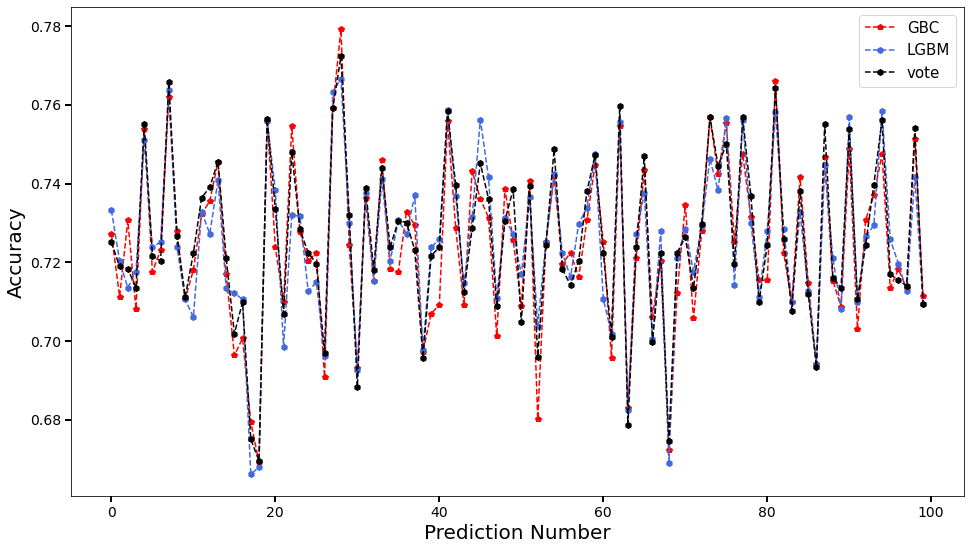

In [ ]:
import mpltex
#create line chart with error bars
fig, ax = plt.subplots(figsize=(16,9))
linestyles =mpltex.linestyle_generator()

ax.plot(i_list, gbc_accuracy, label = "GBC", color='red', marker='p', linestyle='--')

ax.plot(i_list,lgbm_accuracy, label = "LGBM", color='royalblue', marker='h', linestyle='--')

ax.plot(i_list,vote2_accuracy, label = "vote", color='k', marker='h', linestyle='--')


plt.legend(fontsize=15)

ax.tick_params(direction='out', length=6, width=2, colors='k',
               grid_color='k', grid_alpha=1.0, labelsize=14)


ax.set_xlabel("Prediction Number", fontsize=20) # x축 이름 설정
ax.set_ylabel("Accuracy", fontsize=20) # y축 이름 설정


In [ ]:
for i in range(0,100):
        train_x, test_x, train_y, test_y = train_test_split(X, y, train_size=0.975, random_state = i, stratify =y)
        vote2 = VotingClassifier(estimators=[('lgb', lightgbm),('gbc', gbc)],voting = 'soft').fit(train_x, train_y)
        vote2_val = vote2.predict(test_x)
        print(i,(0.7 * (f1_score(test_y, vote2_val)) + 0.3 * (roc_auc_score(test_y,vote2_val))))

0 0.7251529378975275
1 0.7129638978445682
2 0.7281793693447687
3 0.7088776627857635
4 0.723471701405866
5 0.7390201885806023
6 0.733740200799801
7 0.7458491967588757
8 0.7273388388441839
9 0.7405348031798771
10 0.7267961446629323
11 0.7401102301455393
12 0.7245702737667313
13 0.7446054760515968
14 0.7267961446629323
15 0.716319181873529
16 0.7106840740278826
17 0.7089626276527604
18 0.7067642787911645
19 0.7354530594969417
20 0.7273742267443107
21 0.721507704593024
22 0.7215409164105806
23 0.7344033927991993
24 0.7298989974406462
25 0.7258729395483896
26 0.7157134345441118
27 0.7517669670554901
28 0.7569269738262773
29 0.7245778741999358
30 0.7272735226030325
31 0.7149144979450677
32 0.723471701405866
33 0.7370220783042944
34 0.7182160475175161
35 0.7344382909135881
36 0.7229238982928168
37 0.7390651371583044
38 0.7251390556929236
39 0.7106840740278826
40 0.7303212515187933
41 0.7129400858893906
42 0.7482292418406485
43 0.7116519453257166
44 0.7376004704086568
45 0.7281793693447687
46 

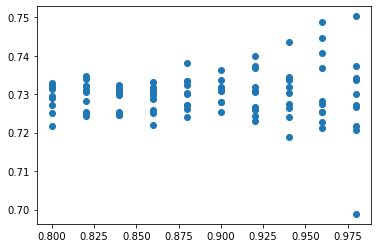

In [ ]:
plt.scatter(j_list, accuracy)


# stacking model

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(X, y, train_size=95, random_state = 45, stratify =y)

In [ ]:
gbc = GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='deviance', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0,
                            min_samples_leaf=1, min_samples_split=2,
                            min_weight_fraction_leaf=0.0, n_estimators=100,
                            n_iter_no_change=None,
                            random_state=0, subsample=1.0, tol=0.0001,
                            validation_fraction=0.1, verbose=0,
                            warm_start=False).fit(train_x,train_y)


lgbm = lgb.LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=200, n_jobs=-1, num_leaves=31,
                objective=None,random_state=0, reg_alpha=0.0, reg_lambda=0.0,
                silent='warn',subsample=1.0, subsample_for_bin=200000,
                subsample_freq=0).fit(train_x,train_y)


dt = DecisionTreeClassifier(criterion='gini',
                                    max_depth=4,
                                    random_state=0).fit(train_x,train_y)

lr_final = LogisticRegression(C=10, random_state=0)

In [ ]:
gbc_pred = gbc.predict(test_x)
lgbm_pred = lgbm.predict(test_x)
dt_pred = dt.predict(test_x)

In [ ]:
print('gbc_acc:{0:4f}'.format(0.7 * (f1_score(test_y, gbc_pred)) + 0.3 * (roc_auc_score(test_y,gbc_pred))))
print('lgbm_acc:{0:4f}'.format(0.7 * (f1_score(test_y, lgbm_pred)) + 0.3 * (roc_auc_score(test_y,lgbm_pred))))
print('dt_acc:{0:4f}'.format(0.7 * (f1_score(test_y, dt_pred)) + 0.3 * (roc_auc_score(test_y,dt_pred))))


gbc_acc:0.726486
lgbm_acc:0.727632
dt_acc:0.725481


In [ ]:
pred = np.array([gbc_pred, lgbm_pred, dt_pred])
print(pred.shape)
pred = np.transpose(pred)
print(pred.shape)

(3, 11936)
(11936, 3)


In [ ]:
lr_final.fit(pred,test_y)
final = lr_final.predict(pred)

print('stack_acc:{0:4f}'.format(0.7 * (f1_score(test_y, final)) + 0.3 * (roc_auc_score(test_y,final))))

stack_acc:0.732166


In [ ]:
for i in range(0,100):
    train_x, test_x, train_y, test_y = train_test_split(X, y, train_size=0.95, random_state = i, stratify =y)
    gbc = GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='deviance', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0,
                            min_samples_leaf=1, min_samples_split=2,
                            min_weight_fraction_leaf=0.0, n_estimators=100,
                            n_iter_no_change=None,
                            random_state=0, subsample=1.0, tol=0.0001,
                            validation_fraction=0.1, verbose=0,
                            warm_start=False).fit(train_x,train_y)


    lgbm = lgb.LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=200, n_jobs=-1, num_leaves=31,
                objective=None,random_state=0, reg_alpha=0.0, reg_lambda=0.0,
                silent='warn',subsample=1.0, subsample_for_bin=200000,
                subsample_freq=0).fit(train_x,train_y)


    dt = DecisionTreeClassifier(criterion='gini',
                                    max_depth=4,
                                    random_state=0).fit(train_x,train_y)

    lr_final = LogisticRegression(C=15, random_state=0)
    
    
    gbc_pred = gbc.predict(test_x)
    lgbm_pred = lgbm.predict(test_x)
    dt_pred = dt.predict(test_x)
    
    
    #print('gbc_acc:{0:4f}'.format(0.7 * (f1_score(test_y, gbc_pred)) + 0.3 * (roc_auc_score(test_y,gbc_pred))))
    #print('lgbm_acc:{0:4f}'.format(0.7 * (f1_score(test_y, lgbm_pred)) + 0.3 * (roc_auc_score(test_y,lgbm_pred))))
    #print('dt_acc:{0:4f}'.format(0.7 * (f1_score(test_y, dt_pred)) + 0.3 * (roc_auc_score(test_y,dt_pred))))

    pred = np.array([gbc_pred, lgbm_pred, dt_pred])
    pred = np.transpose(pred)
    
    lr_final.fit(pred,test_y)
    final = lr_final.predict(pred)
    print(i)
    print('stack_acc:{0:4f}'.format(0.7 * (f1_score(test_y, final)) + 0.3 * (roc_auc_score(test_y,final))))


NotFittedError: This GradientBoostingClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

# k-fold 기반 스태킹

In [ ]:
X=X.reset_index(drop=True)
y=y.reset_index(drop=True)

In [ ]:
X

,나이,성별,키,몸무게,수축기 혈압,이완기 혈압,콜레스테롤,포도당,흡연,음주,신체활동,BMI,콜흡,콜음,콜포,차
0,18371.0,2.0,172.0,104.0,156.0,96.0,1.0,1.0,0.0,0.0,0.0,35.154137,0.0,0.0,1.0,60.0
1,14455.0,1.0,164.0,62.0,110.0,70.0,1.0,1.0,0.0,0.0,1.0,23.051755,0.0,0.0,1.0,40.0
2,17533.0,2.0,177.0,86.0,120.0,80.0,1.0,1.0,0.0,0.0,1.0,27.450605,0.0,0.0,1.0,40.0
3,16010.0,2.0,175.0,88.0,120.0,80.0,1.0,1.0,0.0,0.0,1.0,28.734694,0.0,0.0,1.0,40.0
4,16091.0,1.0,165.0,88.0,130.0,90.0,1.0,1.0,0.0,0.0,0.0,32.323232,0.0,0.0,1.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59661,18215.0,1.0,174.0,73.0,110.0,70.0,2.0,1.0,0.0,0.0,1.0,24.111507,0.0,0.0,2.0,40.0
59662,21979.0,2.0,169.0,68.0,120.0,80.0,1.0,3.0,0.0,1.0,1.0,23.808690,0.0,1.0,3.0,40.0
59663,14557.0,2.0,178.0,87.0,110.0,70.0,2.0,1.0,1.0,0.0,1.0,27.458654,2.0,0.0,2.0,40.0
59664,18842.0,2.0,168.0,62.0,110.0,70.0,2.0,1.0,0.0,0.0,1.0,21.967120,0.0,0.0,2.0,40.0


In [ ]:
y

0        1.0
1        0.0
2        0.0
3        1.0
4        0.0
        ... 
59661    1.0
59662    0.0
59663    1.0
59664    0.0
59665    1.0
Name: label, Length: 59666, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.95, random_state = 44, stratify =y)

In [ ]:
gbc = GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='deviance', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0,
                            min_samples_leaf=1, min_samples_split=2,
                            min_weight_fraction_leaf=0.0, n_estimators=100,
                            n_iter_no_change=None,
                            random_state=0, subsample=1.0, tol=0.0001,
                            validation_fraction=0.1, verbose=0,
                            warm_start=False)

lgbm = lgb.LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=200, n_jobs=-1, num_leaves=31,
                objective=None,random_state=0, reg_alpha=0.0, reg_lambda=0.0,
                silent='warn',subsample=1.0, subsample_for_bin=200000,
                subsample_freq=0)

dt = DecisionTreeClassifier(criterion='gini',
                                    max_depth=4,
                                    random_state=0)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds):
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=0)
    
    train_fold_pred = np.zeros((X_train_n.shape[0], 1))
    test_pred = np.zeros((X_test_n.shape[0], n_folds))
    print(model.__class__.__name__,' model 시작')
    
    for folder_counter, (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        print('\t 폴드 세트: ',folder_counter+1,' 시작')
        X_tr = X_train_n.iloc[train_index]
        y_tr = y_train_n.iloc[train_index]
        X_te = X_train_n.iloc[valid_index]
        
        model.fit(X_tr, y_tr)
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1, 1)
        test_pred[:, folder_counter] = model.predict(X_test_n)
        
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)
    
    return train_fold_pred, test_pred_mean

In [ ]:
dt_train, dt_test = get_stacking_base_datasets(dt, X_train, y_train, X_test, 20)
gbc_train, gbc_test = get_stacking_base_datasets(gbc, X_train, y_train, X_test, 20)
lgbm_train, lgbm_test = get_stacking_base_datasets(lgbm, X_train, y_train, X_test, 20)

DecisionTreeClassifier  model 시작
	 폴드 세트:  1  시작
	 폴드 세트:  2  시작
	 폴드 세트:  3  시작
	 폴드 세트:  4  시작
	 폴드 세트:  5  시작
	 폴드 세트:  6  시작
	 폴드 세트:  7  시작
	 폴드 세트:  8  시작
	 폴드 세트:  9  시작
	 폴드 세트:  10  시작
	 폴드 세트:  11  시작
	 폴드 세트:  12  시작
	 폴드 세트:  13  시작
	 폴드 세트:  14  시작
	 폴드 세트:  15  시작
	 폴드 세트:  16  시작
	 폴드 세트:  17  시작
	 폴드 세트:  18  시작
	 폴드 세트:  19  시작
	 폴드 세트:  20  시작
GradientBoostingClassifier  model 시작
	 폴드 세트:  1  시작
	 폴드 세트:  2  시작
	 폴드 세트:  3  시작
	 폴드 세트:  4  시작
	 폴드 세트:  5  시작
	 폴드 세트:  6  시작
	 폴드 세트:  7  시작
	 폴드 세트:  8  시작
	 폴드 세트:  9  시작
	 폴드 세트:  10  시작
	 폴드 세트:  11  시작
	 폴드 세트:  12  시작
	 폴드 세트:  13  시작
	 폴드 세트:  14  시작
	 폴드 세트:  15  시작
	 폴드 세트:  16  시작
	 폴드 세트:  17  시작
	 폴드 세트:  18  시작
	 폴드 세트:  19  시작
	 폴드 세트:  20  시작
LGBMClassifier  model 시작
	 폴드 세트:  1  시작
	 폴드 세트:  2  시작
	 폴드 세트:  3  시작
	 폴드 세트:  4  시작
	 폴드 세트:  5  시작
	 폴드 세트:  6  시작
	 폴드 세트:  7  시작
	 폴드 세트:  8  시작
	 폴드 세트:  9  시작
	 폴드 세트:  10  시작
	 폴드 세트:  11  시작
	 폴드 세트:  12  시작
	 폴드 세트:  13  시작
	 폴드 세트:  14  시작
	 폴드 세트:  15  

In [ ]:
Stack_final_X_train = np.concatenate((dt_train, gbc_train, lgbm_train),axis=1)
Stack_final_X_test = np.concatenate((dt_test, gbc_test, lgbm_test),axis=1)

print('원본 학습 피처 데이터 Shape:', X_train.shape, '원본 테스트 피쳐 Shape:', X_test.shape)
print('스태킹 학습 피처 데이터 Shape:', Stack_final_X_train.shape,
     '스태킹 테스트 피처 데이터 Shape:', Stack_final_X_test.shape)

원본 학습 피처 데이터 Shape: (56682, 16) 원본 테스트 피쳐 Shape: (2984, 16)
스태킹 학습 피처 데이터 Shape: (56682, 3) 스태킹 테스트 피처 데이터 Shape: (2984, 3)


In [ ]:
lr_final = LogisticRegression(C=10, random_state=44)
lr_final.fit(Stack_final_X_train, y_train)
stack_final = lr_final.predict(Stack_final_X_test)

print("최종 메타 모델의 예측 정확도: {0:4f}".format(0.7 * (f1_score(y_test, stack_final)) + 0.3 * (roc_auc_score(y_test,stack_final))))



최종 메타 모델의 예측 정확도: 0.736479


In [ ]:
test_dt = pd.read_csv("test_공개.csv")
id=test_dt["id"]
for i in range(len(test_dt)):
    if test_dt["이완기 혈압"].iloc[i] >= 1000:
        test_dt["이완기 혈압"].iloc[i] = (test_dt["이완기 혈압"].iloc[i])/10
        
test_dt=test_dt.drop(["id"],axis=1)

test_dt["BMI"] = test_dt["몸무게"]/(test_dt["키"]/100)**2
test_dt["콜흡"] = test_dt["콜레스테롤"] * test_dt["흡연"]
test_dt["콜음"] = test_dt["콜레스테롤"] * test_dt["음주"]
test_dt["콜포"] = test_dt["콜레스테롤"] * test_dt["포도당"]
test_dt["차"] = test_dt["수축기 혈압"] - test_dt["이완기 혈압"] 

In [ ]:
test_dt

,나이,성별,키,몸무게,수축기 혈압,이완기 혈압,콜레스테롤,포도당,흡연,음주,신체활동,BMI,콜흡,콜음,콜포,차
0,21055,1,149,55.0,120,80.0,1,1,0,0,1,24.773659,0,0,1,40.0
1,21908,2,168,64.0,120,79.0,2,1,0,0,1,22.675737,0,0,2,41.0
2,21147,2,172,106.0,120,80.0,1,1,0,0,0,35.830178,0,0,1,40.0
3,19770,1,164,119.0,150,77.0,2,2,0,1,1,44.244497,0,2,4,73.0
4,20587,2,172,69.0,120,80.0,2,1,1,0,0,23.323418,2,0,2,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,20188,1,169,74.0,110,80.0,1,1,0,0,1,25.909457,0,0,1,30.0
9996,16770,1,170,64.0,110,70.0,1,1,0,0,1,22.145329,0,0,1,40.0
9997,22012,1,170,152.0,220,120.0,3,1,0,0,0,52.595156,0,0,3,100.0
9998,18988,1,170,68.0,120,80.0,1,1,0,0,1,23.529412,0,0,1,40.0


In [ ]:
train_x, test_x, train_y, test_y = train_test_split(X, y, train_size=0.8,
                                                            random_state = 45, stratify = y_label)
vote2 = VotingClassifier(estimators=[('lgb', lightgbm),('gbc', gbc)],voting = 'soft').fit(train_x, train_y)
vote2_val = vote2.predict(test_dt)
vote2_pro = vote2.predict_proba(test_dt)[:,1]

In [ ]:
vote2_val=pd.DataFrame(vote2_val, columns=['pred_label'])

In [ ]:
vote2_pro=pd.DataFrame(vote2_pro, columns=['pred_prob'])

In [ ]:
final=pd.concat([id, vote2_pro,vote2_val], axis=1)

In [ ]:
final.to_csv("final.csv")

In [ ]:
final

,id,pred_prob,pred_label
0,0,0.358350,0.0
1,1,0.472411,0.0
2,2,0.598062,1.0
3,3,0.803137,1.0
4,4,0.431331,0.0
...,...,...,...
9995,9995,0.287613,0.0
9996,9996,0.159981,0.0
9997,9997,0.935561,1.0
9998,9998,0.268416,0.0


In [ ]:
test_dt[test_dt["이완기 혈압"]>1000]

,나이,성별,키,몸무게,수축기 혈압,이완기 혈압,콜레스테롤,포도당,흡연,음주,신체활동
142,20250,1,159,60.0,160,1100,2,1,0,0,1
175,18258,1,156,114.0,180,1200,3,3,0,0,1
383,16741,1,155,100.0,136,1022,3,3,0,1,1
599,18858,1,150,70.0,180,1100,3,3,0,0,0
834,19076,1,146,74.0,180,1200,2,1,0,0,1
963,18081,2,175,98.0,160,1120,2,1,0,0,0
1198,15912,1,167,99.0,180,1100,2,1,0,0,1
1304,22444,2,164,65.0,150,1100,1,1,0,0,1
1317,17489,2,183,98.0,160,1100,1,2,1,0,1
1515,21203,1,162,89.0,150,1125,2,1,0,0,1


In [ ]:
test_dt[test_dt["수축기 혈압"]>500]

,나이,성별,키,몸무게,수축기 혈압,이완기 혈압,콜레스테롤,포도당,흡연,음주,신체활동
1079,20970,1,154,41.0,806,0,1,1,0,0,1
